<a href="https://colab.research.google.com/github/andy311p/Udemy_deep_learning_pytorch/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

In [ ]:
import numpy as np
import torch
import torch.nn as nn               #required to build linear regression
from torch.autograd import Variable #required for backprop
import matplotlib.pyplot as plt


DATA INITIALIZATION

In [ ]:
#x list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_values = [i for i in range(11)]

#convert to numpy array
x_train = np.array(x_values,dtype=np.float32)
print(x_train.shape)

#reshape it to a matrix of 11*1
x_train = x_train.reshape(-1,1)
print(x_train.shape)

#quicker virsion for y=2*x+1
y_train = np.array([(2*i+1) for i in x_values],dtype=np.float32).reshape(-1,1)


(11,)
(11, 1)


MODEL

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LinearRegressionModel,self).__init__()
    self.linear = nn.Linear(input_dim,output_dim)

  def forward(self,x):
    out = self.linear(x)
    return out  

MODEL ATTRIBUTES

In [ ]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim,output_dim)

#Mean Squared Loss function
criterion = nn.MSELoss()
#Learning Rate
learning_rate = 0.01
#instantiate optimizer class - Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

TRAINING

In [ ]:
epochs = 100

for epoch in range(epochs):
  epoch += 1
  #convert numpy arrays to torch Variable
  inputs = Variable(torch.from_numpy(x_train))
  labels = Variable(torch.from_numpy(y_train))
  #clear gradients for every epoch
  optimizer.zero_grad()
  
  #predict
  outputs = model(inputs)
  
  #calculate loss
  loss = criterion(outputs,labels)
  
  #getting gradients
  loss.backward()
  
  #update the parameters
  optimizer.step()

  #print(loss.data)
  print('epoch {} loss {}'.format(epoch,loss.data))


epoch 1 loss 154.1261444091797
epoch 2 loss 12.578171730041504
epoch 3 loss 1.0324769020080566
epoch 4 loss 0.09065954387187958
epoch 5 loss 0.013766243122518063
epoch 6 loss 0.007423108443617821
epoch 7 loss 0.006835454609245062
epoch 8 loss 0.006717944052070379
epoch 9 loss 0.006639566738158464
epoch 10 loss 0.006565123796463013
epoch 11 loss 0.0064918105490505695
epoch 12 loss 0.006419308017939329
epoch 13 loss 0.0063476283103227615
epoch 14 loss 0.0062767090275883675
epoch 15 loss 0.006206620018929243
epoch 16 loss 0.0061373175121843815
epoch 17 loss 0.006068784277886152
epoch 18 loss 0.006001029629260302
epoch 19 loss 0.005934029817581177
epoch 20 loss 0.005867768544703722
epoch 21 loss 0.005802232306450605
epoch 22 loss 0.0057374220341444016
epoch 23 loss 0.00567333959043026
epoch 24 loss 0.005610004998743534
epoch 25 loss 0.005547364242374897
epoch 26 loss 0.005485424771904945
epoch 27 loss 0.005424171686172485
epoch 28 loss 0.005363586824387312
epoch 29 loss 0.00530372746288776

PLOT DATA

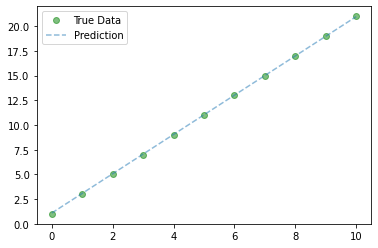

In [ ]:
#clear the plot
plt.clf()

predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train,y_train,'go',label='True Data', alpha=0.5)
plt.plot(x_train,predicted,'--',label='Prediction',alpha = 0.5)
plt.legend(loc='best')
plt.show()

SAVE MODEL

In [ ]:
save_model = True
if save_model:
  #saves only parameters
  torch.save(model.state_dict(), 'linearReg1.pkl')

LOAD MODEL

In [ ]:
load_model = True
if load_model:
  model.load_state_dict(torch.load('linearReg1.pkl'))